# Bivariate: Numeric vs Geographical

In [2]:
require(tidyverse)
require(sf)
require(repr)
require(plotly)

In [3]:
options(repr.plot.width=12, repr.plot.height=12)

In [5]:
NG <- read_csv("Datasets/NGA_adm1.csv")
NG_Geom <- st_read("Datasets/Geo/NGA_adm1.shp")
INEC <- read_csv("Datasets/INEC.csv")

In [6]:
INEC %>% 
    select(State, APC, PDP, LP, NNPP, longitude, latitude) -> INEC

In [7]:
NG %>% select(State=NAME_1) %>% cbind(NG_Geom) -> NIG

In [8]:
INEC %>% left_join(NIG, by = 'State') -> INEC

In [9]:
INEC %>% st_as_sf() -> INEC

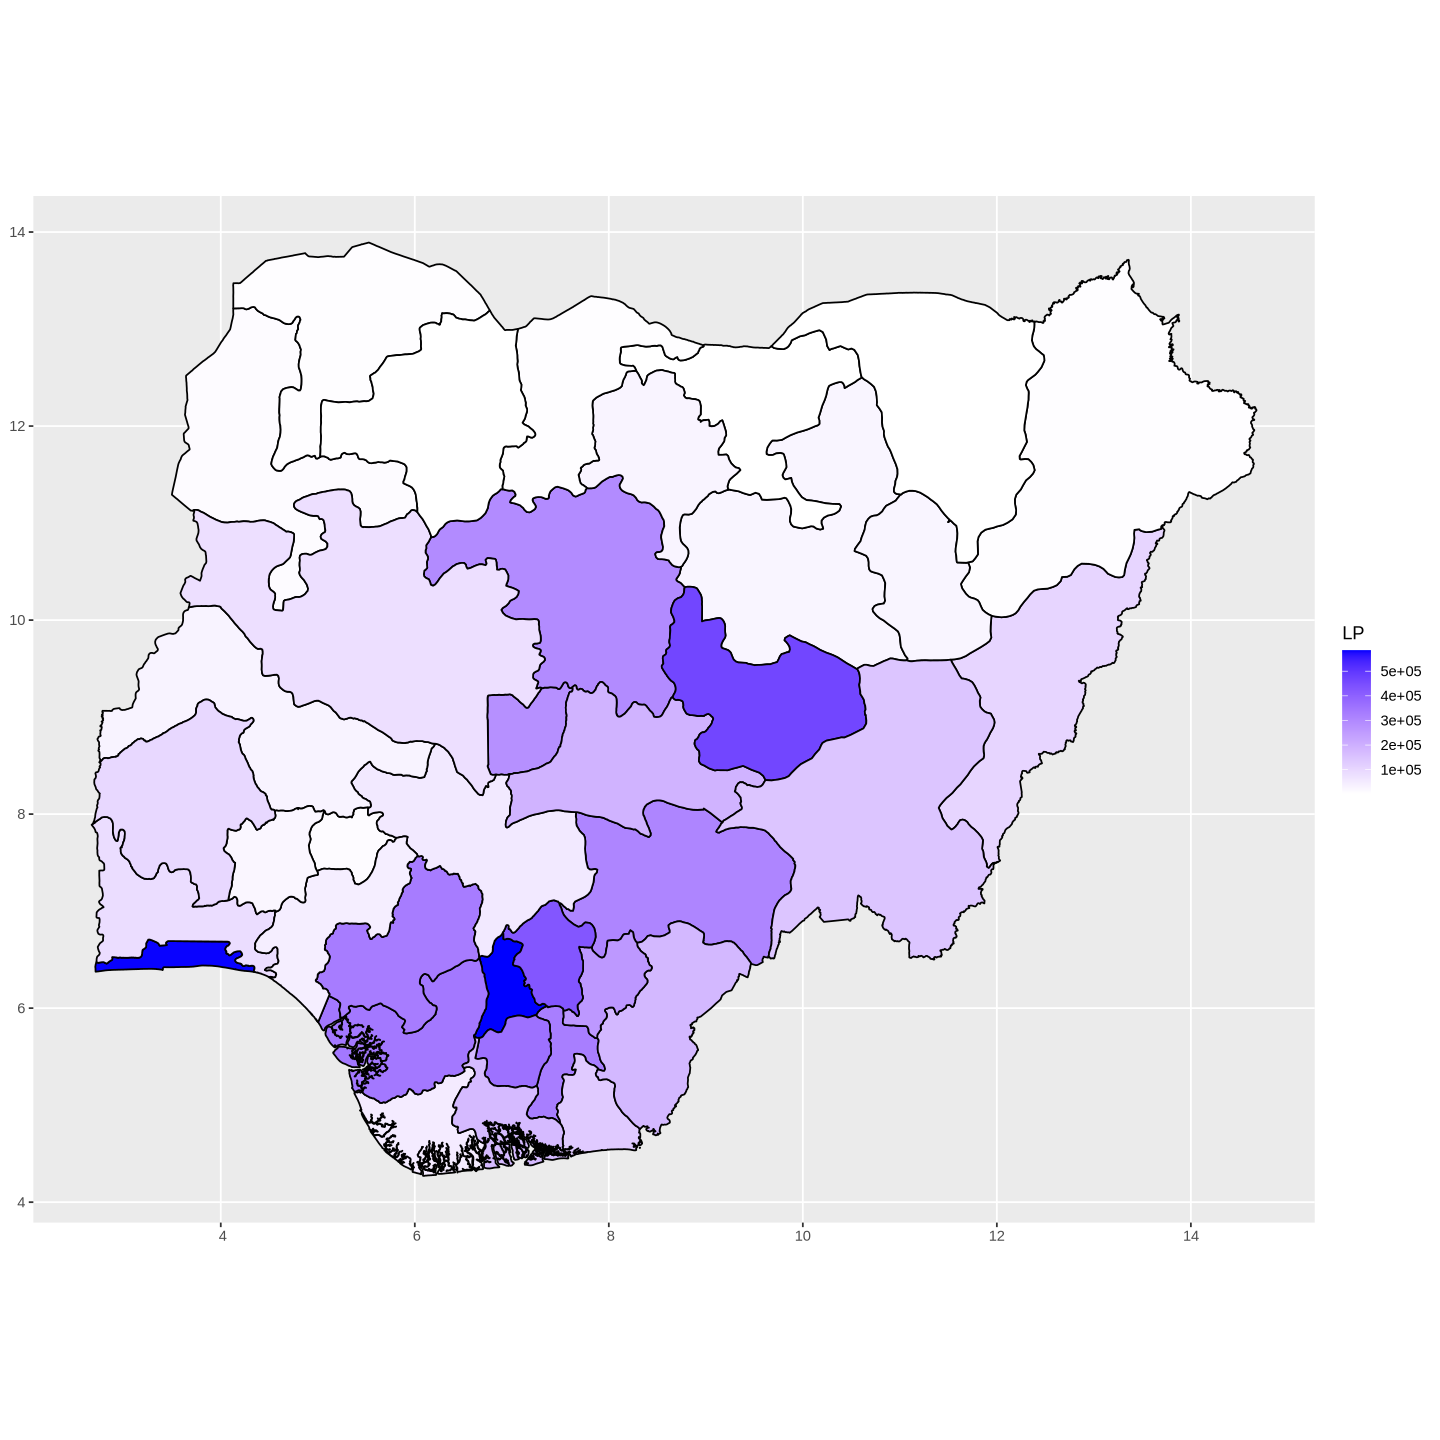

In [10]:
INEC %>% 
    ggplot() + 
        geom_sf(data=INEC, aes(fill=LP), lwd=0.5, col='black') + 
        scale_fill_gradient(low='white', high='blue') 

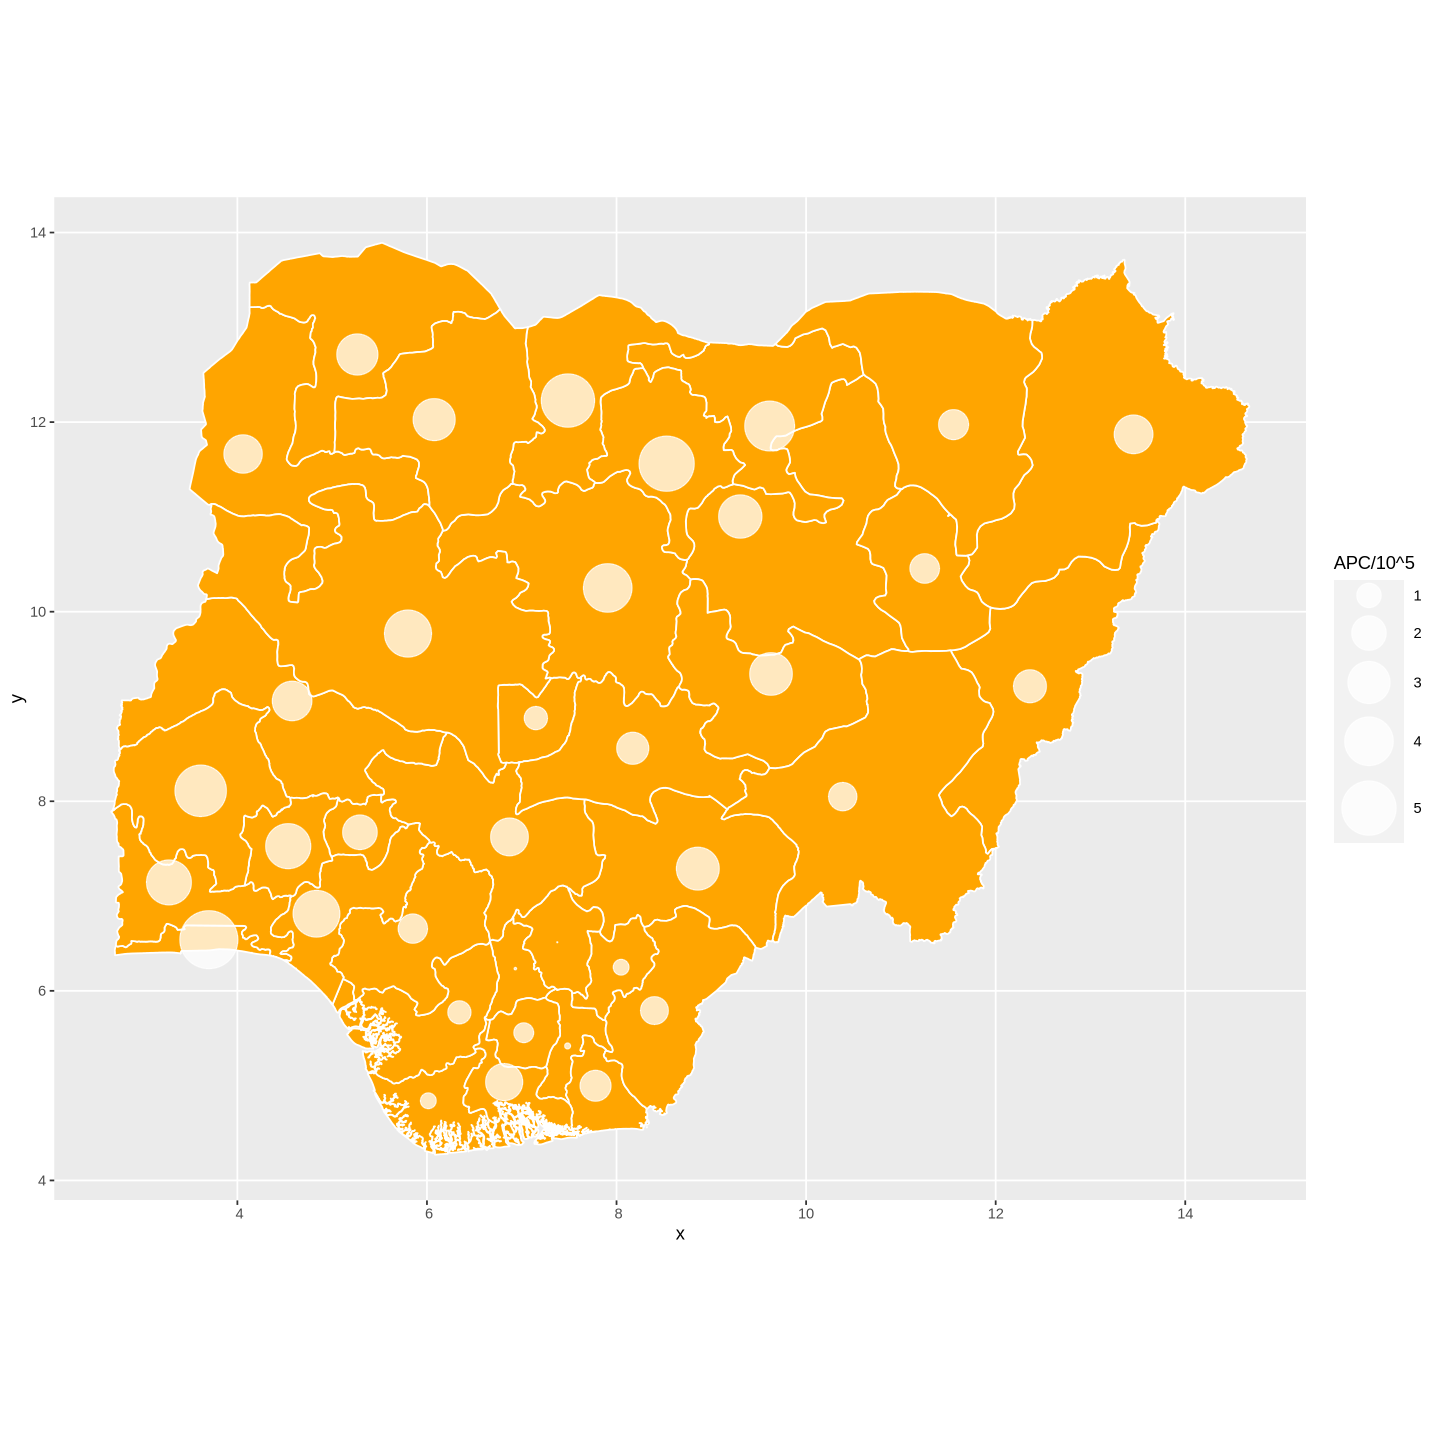

In [11]:
INEC %>% 
    ggplot() + 
        geom_sf(data=INEC, col='white', lwd=0.5, fill='orange') + 
        stat_sf_coordinates(aes(size=APC/10^5), col='white', alpha=0.75) + 
        scale_size(range = c(0, 16)) 